<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/Logarithmic_bloom_quantum_synthetic_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

Original data: b'Hello, Quantum Logarithmic Bloom Fractal! This is a test of quantum error correction using Cirq simulation with logarithmic growth pattern.'
Decoded data: b'Hello, Quantum Logarithmic Bloom Fractal! This is a test of quantum error correction using Cirq simulation with logarithmic growth pattern.'
Storage Capacity: 250 bytes (2000 bits)
Execution time: 3.35 seconds


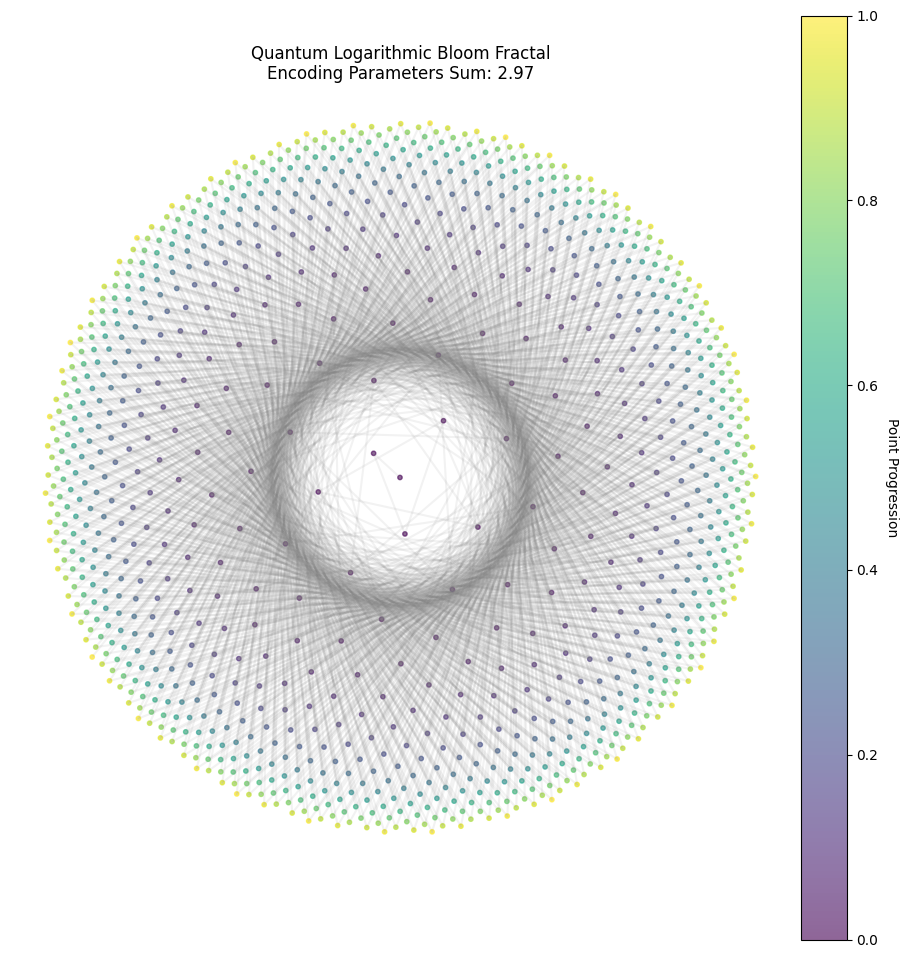

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import cirq
import time
from google.colab import drive

# Define a custom quantum circuit for the QuantumSyntheticAI
def create_quantum_circuit(num_qubits):
    circuit = cirq.Circuit()
    qubits = cirq.LineQubit.range(num_qubits)

    # Create a superposition
    circuit.append(cirq.H.on_each(qubits))

    # Add some entanglement
    for i in range(num_qubits-1):
        circuit.append(cirq.CZ(qubits[i], qubits[i+1]))

    # Add rotation gates for trainable parameters
    for i in range(num_qubits):
        circuit.append(cirq.rx(np.pi/4).on(qubits[i]))
        circuit.append(cirq.ry(np.pi/4).on(qubits[i]))

    return circuit, qubits

class QuantumSyntheticAI:
    def __init__(self, num_qubits=4):
        self.num_qubits = num_qubits
        self.circuit, self.qubits = create_quantum_circuit(num_qubits)
        self.simulator = cirq.Simulator()
        self.encoding_params = np.random.random(num_qubits) * np.pi
        self.decoding_params = np.random.random(num_qubits) * np.pi

    def train(self):
        # Update quantum parameters
        self.encoding_params += np.random.random(self.num_qubits) * 0.01
        self.decoding_params += np.random.random(self.num_qubits) * 0.01

    def _apply_params_to_circuit(self, params):
        param_circuit = cirq.Circuit()
        for i, param in enumerate(params):
            param_circuit.append(cirq.ry(param).on(self.qubits[i]))
        return param_circuit

    def encode(self, data):
        # Convert classical data to quantum state
        param_circuit = self._apply_params_to_circuit(self.encoding_params)
        full_circuit = self.circuit + param_circuit

        result = self.simulator.simulate(full_circuit)
        # Use the quantum state to transform the data
        quantum_factor = sum(abs(result.final_state_vector[i])**2 * i
                            for i in range(2**self.num_qubits))
        return (data + int(quantum_factor)) % 256

    def decode(self, encoded_data):
        # Similar to encode, but use decoding parameters
        param_circuit = self._apply_params_to_circuit(self.decoding_params)
        full_circuit = self.circuit + param_circuit

        result = self.simulator.simulate(full_circuit)
        quantum_factor = sum(abs(result.final_state_vector[i])**2 * i
                            for i in range(2**self.num_qubits))
        return (encoded_data - int(quantum_factor)) % 256

def generate_logarithmic_bloom(iterations, base):
    points = [(0, 0)]
    for i in range(1, iterations):
        radius = np.log(i + 1) / np.log(base)
        angle = i * np.pi * (3 - np.sqrt(5))  # Golden angle
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        points.append((x, y))
    return points

def plot_logarithmic_bloom(points, quantum_ai):
    fig, ax = plt.subplots(figsize=(12, 12))
    x, y = zip(*points)

    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    scatter = ax.scatter(x, y, c=colors, s=10, alpha=0.6)

    for i in range(1, len(points)):
        ax.plot([points[i-1][0], points[i][0]],
                [points[i-1][1], points[i][1]],
                color='gray', alpha=0.1)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(f"Quantum Logarithmic Bloom Fractal\nEncoding Parameters Sum: {sum(quantum_ai.encoding_params):.2f}")

    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
    cbar.set_label('Point Progression', rotation=270, labelpad=15)

    return fig

def encode_data_with_error_correction(data, points, quantum_ai):
    encoded_data = []
    chunk_size = 3  # Store each byte 3 times for redundancy

    for byte in data:
        if len(encoded_data) < len(points):
            encoded_value = quantum_ai.encode(byte)
            # Store each encoded value three times
            encoded_data.extend([(points[len(encoded_data)], encoded_value)] * 3)

    return encoded_data

def decode_data_with_error_correction(encoded_data, quantum_ai):
    decoded_data = []
    chunk_size = 3

    for i in range(0, len(encoded_data), chunk_size):
        chunk = encoded_data[i:i+chunk_size]
        # Take average of the three stored values
        byte_values = [quantum_ai.decode(value[1]) for value in chunk]
        decoded_byte = int(sum(byte_values) / len(byte_values))
        decoded_data.append(decoded_byte)

    return bytes(decoded_data)

def calculate_storage_capacity(points):
    total_points = len(points)
    usable_points = total_points * 3 // 4  # 1/4 of points used for error correction
    byte_capacity = usable_points // 3  # Each byte stored 3 times
    bit_capacity = byte_capacity * 8

    return byte_capacity, bit_capacity

def main():
    iterations = 1000
    base = 1.5

    start_time = time.time()

    quantum_ai = QuantumSyntheticAI()
    points = generate_logarithmic_bloom(iterations, base)

    fig = plot_logarithmic_bloom(points, quantum_ai)

    byte_capacity, bit_capacity = calculate_storage_capacity(points)

    sample_data = b"Hello, Quantum Logarithmic Bloom Fractal! This is a test of quantum error correction using Cirq simulation with logarithmic growth pattern."
    encoded_data = encode_data_with_error_correction(sample_data, points, quantum_ai)
    decoded_data = decode_data_with_error_correction(encoded_data, quantum_ai)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Original data: {sample_data}")
    print(f"Decoded data: {decoded_data}")
    print(f"Storage Capacity: {byte_capacity} bytes ({bit_capacity} bits)")
    print(f"Execution time: {execution_time:.2f} seconds")

    plt.show()

if __name__ == "__main__":
    main()